In [6]:
import pickle 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pathlib import Path 


## Step 1: Simulation Output 

In [7]:
with open('/sietch_colab/akapoor/PRS_Portability/experiments/split_migration/simulations/0/effect_sizes.pkl', 'rb') as f:
    effect_sizes = pickle.load(f)

In [8]:
effect_sizes

,position,site_id,effect_size,causal_allele,allele_freq,trait_id
0,443569,3155,0.399774,G,0.025,0
1,660266,4595,-0.905479,T,0.900,0
2,694308,4891,-0.378163,C,0.025,0
3,778077,5499,1.299228,C,0.050,0
4,878283,6186,-0.356264,C,0.025,0
...,...,...,...,...,...,...
95,9254836,66723,1.461444,G,0.325,0
96,9400915,67751,-1.107046,C,0.025,0
97,9671595,69695,-0.894727,C,0.025,0
98,9702024,69907,0.643327,C,0.825,0


In [9]:
with open('/sietch_colab/akapoor/PRS_Portability/experiments/split_migration/simulations/0/phenotype.pkl', 'rb') as f:
    phenotype = pickle.load(f)

In [10]:
phenotype

,trait_id,individual_id,population,genetic_value,environmental_noise,phenotype
0,0,0,YRI,1.149963,0.869750,2.019713
1,0,1,YRI,-3.512245,-2.968412,-6.480657
2,0,2,YRI,-1.912825,2.142003,0.229177
3,0,3,YRI,0.031193,2.684641,2.715834
4,0,4,YRI,4.456909,-5.568813,-1.111904
5,0,5,YRI,11.830988,-3.716793,8.114195
6,0,6,YRI,-2.973156,0.364893,-2.608263
7,0,7,YRI,4.256293,-0.902647,3.353646
8,0,8,YRI,5.829517,-0.047955,5.781561
9,0,9,YRI,2.755464,-2.434832,0.320633


In [11]:
import tskit
import numpy as np
import pandas as pd

# Load the tree sequence
ts = tskit.load('/sietch_colab/akapoor/PRS_Portability/experiments/split_migration/simulations/0/tree_sequence.trees')

print('Tree Sequence Information:')
print('=' * 70)
print(f'Sequence length: {ts.sequence_length:,.0f} bp')
print(f'Number of samples (haplotypes): {ts.num_samples}')
print(f'Number of individuals: {ts.num_individuals}')
print(f'Number of variant sites: {ts.num_sites}')
print(f'Number of mutations: {ts.num_mutations}')
print()

Tree Sequence Information:
Sequence length: 10,000,000 bp
Number of samples (haplotypes): 40
Number of individuals: 20
Number of variant sites: 72072
Number of mutations: 72330



In [12]:
# Extract genotype matrix
# Method 1: Get full genotype matrix (sites × samples)
print('Method 1: Full Genotype Matrix')
print('-' * 70)
genotypes = ts.genotype_matrix()
print(f'Shape: {genotypes.shape} (sites × samples/haplotypes)')
print(f'Data type: {genotypes.dtype}')
print()
print('First 5 sites, first 10 haplotypes:')
print(genotypes[:5, :10])
print()


Method 1: Full Genotype Matrix
----------------------------------------------------------------------
Shape: (72072, 40) (sites × samples/haplotypes)
Data type: int32

First 5 sites, first 10 haplotypes:
[[0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 1 0 0 0 1 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0]]



In [13]:
# Method 2: Convert to individual-level genotypes (diploid)
# Sum pairs of haplotypes to get 0/1/2 genotypes
print('Method 2: Individual-level Genotypes (0/1/2)')
print('-' * 70)
# Reshape: each individual has 2 consecutive haplotypes
n_individuals = ts.num_individuals
individual_genotypes = genotypes[:, ::2] + genotypes[:, 1::2]
print(f'Shape: {individual_genotypes.shape} (sites × individuals)')
print()
print('First 5 sites, first 10 individuals:')
print(individual_genotypes[:5, :10])
print()

# Method 3: Get positions and alleles
print('Method 3: Variant Information')
print('-' * 70)
positions = []
ref_alleles = []
alt_alleles = []

for variant in ts.variants():
    positions.append(int(variant.site.position))
    ref_alleles.append(variant.alleles[0])
    alt_alleles.append(variant.alleles[1] if len(variant.alleles) > 1 else '.')

print(f'Total variants: {len(positions)}')
print()
print('First 10 variants:')
for i in range(min(10, len(positions))):
    print(f'  Position {positions[i]:8d}: {ref_alleles[i]} → {alt_alleles[i]}')
print()

# Method 4: Create a pandas DataFrame
print('Method 4: As Pandas DataFrame')
print('-' * 70)
# Create DataFrame with variant info
variant_df = pd.DataFrame({
    'position': positions,
    'ref': ref_alleles,
    'alt': alt_alleles
})

# Add genotypes as columns (one per individual)
for i in range(min(5, n_individuals)):  # Just first 5 individuals for display
    variant_df[f'ind_{i}'] = individual_genotypes[:, i]

print(variant_df.head(10))
print()

# Summary statistics
print('Genotype Summary:')
print('-' * 70)
print(f'Min genotype: {individual_genotypes.min()}')
print(f'Max genotype: {individual_genotypes.max()}')
print(f'Mean genotype: {individual_genotypes.mean():.3f}')
print(f'Proportion of sites with variation: {(individual_genotypes.sum(axis=1) > 0).mean():.3f}')

Method 2: Individual-level Genotypes (0/1/2)
----------------------------------------------------------------------
Shape: (72072, 20) (sites × individuals)

First 5 sites, first 10 individuals:
[[0 2 0 0 0 2 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 2]
 [1 0 1 1 1 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]]

Method 3: Variant Information
----------------------------------------------------------------------
Total variants: 72072

First 10 variants:
  Position        3: T → C
  Position      218: T → C
  Position      258: G → A
  Position      653: G → A
  Position      731: T → G
  Position      895: G → C
  Position     1145: C → A
  Position     1310: C → A
  Position     1785: A → C
  Position     1876: T → C

Method 4: As Pandas DataFrame
----------------------------------------------------------------------
   position ref alt  ind_0  ind_1  ind_2  ind_3  ind_4
0         3   T   C      0      2      0      0      0
1       218   T   C      0      0      0      0      0
2       

In [14]:
individual_genotypes

array([[0, 2, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 2, ..., 0, 2, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 2, 2, ..., 2, 1, 0],
       [0, 1, 1, ..., 0, 0, 0]], shape=(72072, 20), dtype=int32)

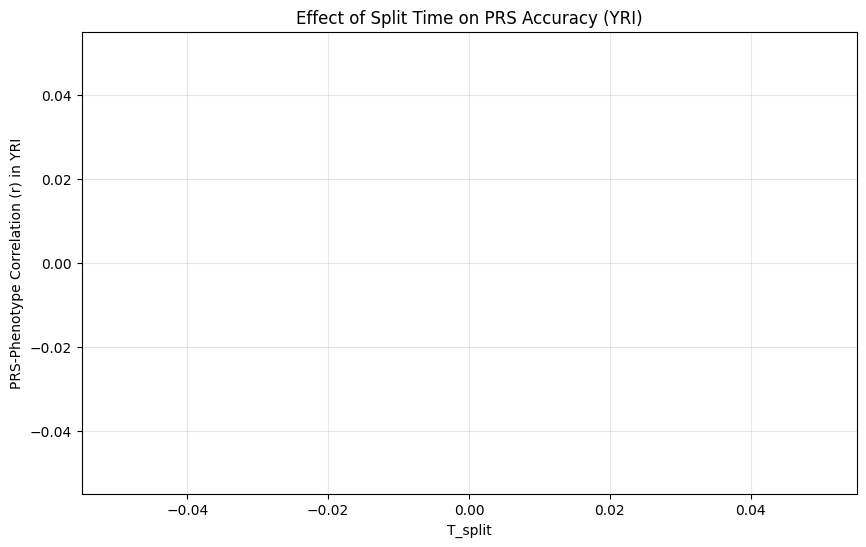

In [3]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

# Base directories
sim_base = Path('/sietch_colab/akapoor/PRS_Portability/experiments/out_of_africa/simulations')
gwas_base = Path('/sietch_colab/akapoor/PRS_Portability/experiments/out_of_africa/gwas')

t_splits = []
r_values = []

# Iterate over simulation directories
# Assuming directories are named with integers
sim_dirs = sorted([d for d in sim_base.iterdir() if d.is_dir() and d.name.isdigit()], key=lambda x: int(x.name))

for sim_dir in sim_dirs:
    sid = sim_dir.name
    
    # Load T_split
    params_path = sim_dir / 'sampled_params.pkl'
    if not params_path.exists():
        continue
        
    with open(params_path, 'rb') as f:
        params = pickle.load(f)
        # Check for T_split key (could be T_split or t_split)
        t_split = params.get('T_split', params.get('t_split'))
        
    # Load PRS results for YRI
    prs_path = gwas_base / sid / 'gwas_prs_values_YRI.csv'
    if not prs_path.exists():
        print(f"PRS file not found for sim {sid}")
        continue
        
    df = pd.read_csv(prs_path)
    
    # Calculate correlation
    if len(df) > 1:
        r = df['PRS'].corr(df['phenotype'])
        
        t_splits.append(t_split)
        r_values.append(r)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(t_splits, r_values, alpha=0.7)
plt.xlabel('T_split')
plt.ylabel('PRS-Phenotype Correlation (r) in YRI')
plt.title('Effect of Split Time on PRS Accuracy (YRI)')
plt.grid(True, alpha=0.3)
plt.show()

In [9]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

# Base directories for OutOfAfrica experiment
sim_base = Path('/sietch_colab/akapoor/PRS_Portability/experiments/out_of_africa/simulations')
gwas_base = Path('/sietch_colab/akapoor/PRS_Portability/experiments/out_of_africa/gwas')

fsts = []
r_values = []

# Iterate over simulation directories
if not sim_base.exists():
    print(f"Directory {sim_base} does not exist yet. Please run the simulation first.")
else:
    sim_dirs = sorted([d for d in sim_base.iterdir() if d.is_dir() and d.name.isdigit()], key=lambda x: int(x.name))

    for sim_dir in sim_dirs:
        sid = sim_dir.name
        
        # Load params to get Fst
        params_path = sim_dir / 'sampled_params.pkl'
        if not params_path.exists():
            continue
            
        with open(params_path, 'rb') as f:
            params = pickle.load(f)
            fst = params.get('Fst', np.nan)
            
        # Load PRS results for YRI
        prs_path = gwas_base / sid / 'gwas_prs_values_YRI.csv'
        if not prs_path.exists():
            # print(f"PRS file not found for sim {sid}")
            continue
            
        df = pd.read_csv(prs_path)
        
        # Calculate correlation
        if len(df) > 1:
            r = df['PRS'].corr(df['phenotype'])
            
            fsts.append(fst)
            r_values.append(r)

    # Plot Fst vs Correlation
    if fsts:
        plt.figure(figsize=(8, 6))
        plt.scatter(fsts, r_values, alpha=0.7, color='purple')
        plt.xlabel('Genetic Distance (Fst)')
        plt.ylabel('PRS-Phenotype Correlation (r) in YRI')
        plt.title('Effect of Genetic Distance (Fst) on PRS Portability (OOA Model)')
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print("No data points found to plot.")

No data points found to plot.


Detected varying parameter: T_AFR_OOA
Range: 1000 - 10000 (linear scale)

1000 simulation replicates loaded
Grid points (unique T_AFR_OOA values): 100
Replicates per grid point: count    100.0
mean      10.0
std        0.0
min       10.0
25%       10.0
50%       10.0
75%       10.0
max       10.0
dtype: float64


,sid,rep,T_AFR_OOA,Fst,r_CEU,r_YRI,portability_ratio,portability_loss
0,0,0,1000.000000,0.032142,0.864279,0.440394,0.509550,0.423886
1,0,1,1000.000000,0.055947,0.842569,0.239490,0.284238,0.603079
2,0,2,1000.000000,0.050736,0.840258,0.356305,0.424043,0.483953
3,0,3,1000.000000,0.054838,0.828456,0.523300,0.631656,0.305156
4,0,4,1000.000000,0.056987,0.802467,0.359261,0.447696,0.443206
5,0,5,1000.000000,0.047970,0.843057,0.261632,0.310338,0.581425
6,0,6,1000.000000,0.039759,0.844677,0.352540,0.417366,0.492137
7,0,7,1000.000000,0.066805,0.876441,0.246748,0.281534,0.629693
8,0,8,1000.000000,0.053595,0.827969,0.524842,0.633891,0.303127
9,0,9,1000.000000,0.038849,0.838063,0.222091,0.265005,0.615972


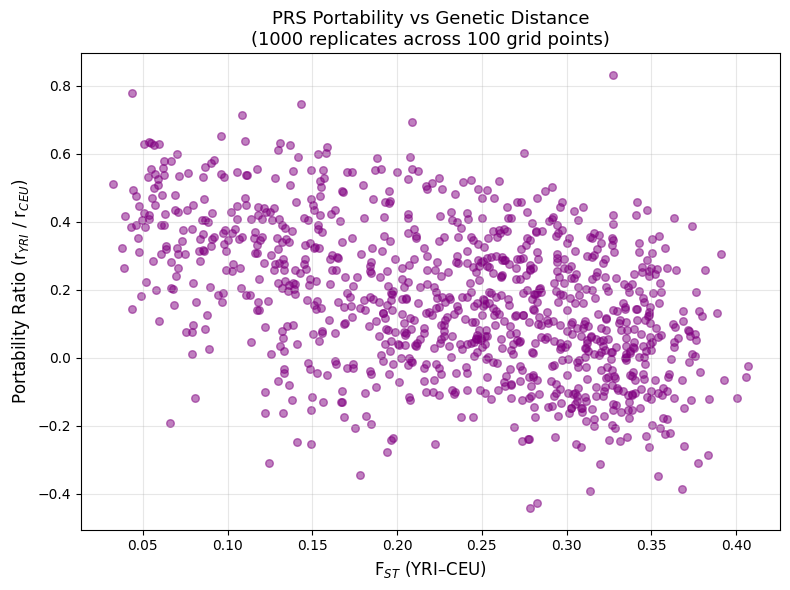


Grouped summary by T_AFR_OOA (mean ± SE across replicates):


,T_AFR_OOA,mean_port_ratio,sd_port_ratio,mean_port_loss,sd_port_loss,mean_r_ceu,mean_r_yri,mean_fst,sd_fst,n,se_port_ratio,se_port_loss,se_fst
0,1000.000000,0.420532,0.138647,0.488163,0.121191,0.840823,0.352660,0.049763,0.010302,10,0.043844,0.038324,0.003258
1,1090.909091,0.392551,0.182250,0.511585,0.151352,0.841294,0.329709,0.049476,0.008018,10,0.057633,0.047862,0.002536
2,1181.818182,0.435518,0.145968,0.469269,0.128146,0.828973,0.359704,0.055712,0.007119,10,0.046159,0.040523,0.002251
3,1272.727273,0.279677,0.228305,0.600952,0.186984,0.835989,0.235037,0.060542,0.012794,10,0.072196,0.059130,0.004046
4,1363.636364,0.361367,0.185365,0.530574,0.156159,0.829976,0.299401,0.067647,0.011371,10,0.058618,0.049382,0.003596
5,1454.545455,0.381957,0.125656,0.519156,0.100532,0.841622,0.322467,0.066337,0.008040,10,0.039736,0.031791,0.002542
6,1545.454545,0.409106,0.174733,0.493945,0.146574,0.836141,0.342197,0.078392,0.012357,10,0.055255,0.046351,0.003908
7,1636.363636,0.390216,0.155480,0.503994,0.130782,0.826386,0.322391,0.081484,0.010496,10,0.049167,0.041357,0.003319
8,1727.272727,0.415736,0.122601,0.483909,0.102353,0.829486,0.345577,0.094369,0.028122,10,0.038770,0.032367,0.008893
9,1818.181818,0.320875,0.225491,0.564965,0.191967,0.828661,0.263696,0.092988,0.013899,10,0.071306,0.060705,0.004395


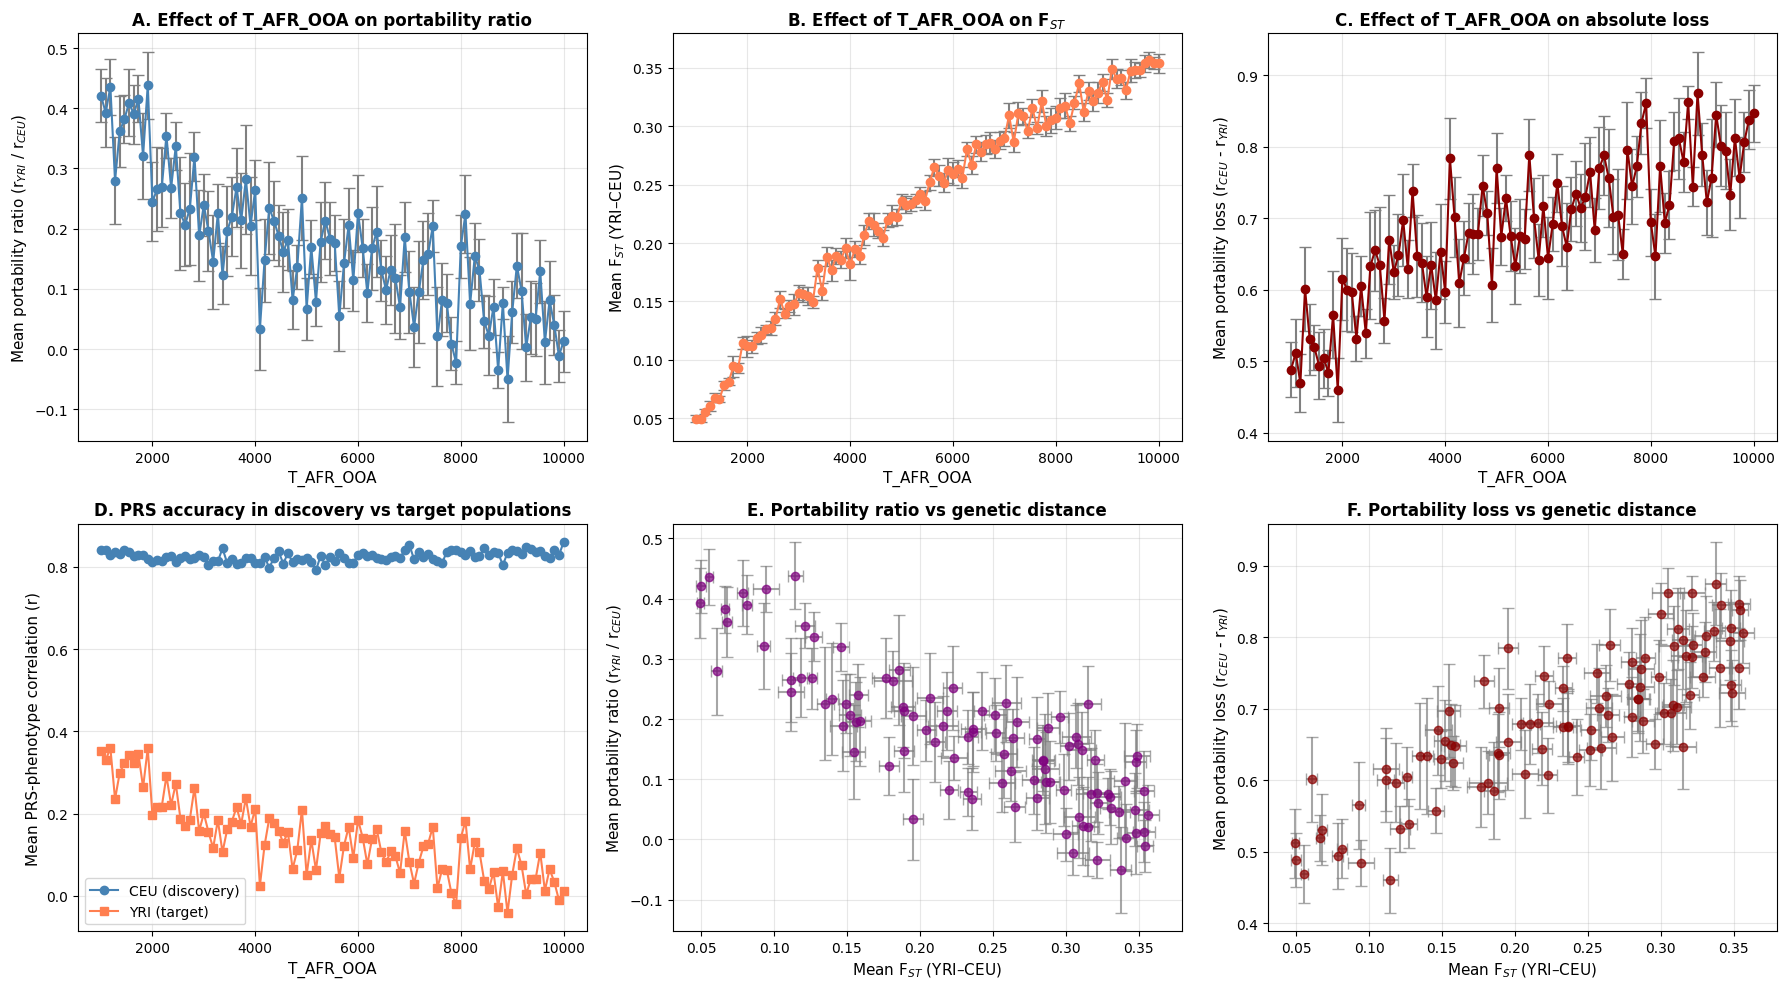


STATISTICAL SUMMARY
Total simulations: 1000
Grid points: 100
Parameter varied: T_AFR_OOA
  Range: 1000.00 - 10000.00

Portability ratio statistics:
  Mean: 0.170 ± 0.216
  Range: -0.442 - 0.832

Portability loss statistics:
  Mean: 0.685 ± 0.181
  Range: 0.129 - 1.160

F_ST statistics:
  Mean: 0.2318 ± 0.0907
  Range: 0.0321 - 0.4071

CORRELATIONS

T_AFR_OOA vs portability ratio:
  ρ = -0.829, p = 0.0000

T_AFR_OOA vs portability loss:
  ρ = 0.847, p = 0.0000

T_AFR_OOA vs F_ST:
  ρ = 0.995, p = 0.0000

F_ST vs portability ratio:
  ρ = -0.830, p = 0.0000

F_ST vs portability loss:
  ρ = 0.849, p = 0.0000

INTERPRETATION
✅ Portability ratio decreases with genetic distance (F_ST)
   Strong correlation: ρ = -0.830, p = 0.0000

✅ Portability loss increases with genetic distance (F_ST)
   Strong correlation: ρ = 0.849, p = 0.0000


In [13]:
import pandas as pd
import numpy as np
import pickle
import json
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# ---------------------------------------------------------
# 1. Paths & setup
# ---------------------------------------------------------
PROJECT_ROOT = Path("/sietch_colab/akapoor/PRS_Portability")
MODEL = "out_of_africa"
CONFIG_PATH = PROJECT_ROOT / "config_files" / "experiment_config_ooa.json"

sim_base  = PROJECT_ROOT / "experiments" / MODEL / "simulations"
gwas_base = PROJECT_ROOT / "experiments" / MODEL / "gwas"

# Load config to detect varying parameter
with open(CONFIG_PATH, "r") as f:
    config = json.load(f)

grid_config = config.get("grid_sampling", {})
VARYING_PARAM = grid_config.get("varying_param", "N_EU0")
MIN_VALUE = grid_config.get("min_value", 0)
MAX_VALUE = grid_config.get("max_value", 1)
SCALE = grid_config.get("scale", "linear")

print(f"Detected varying parameter: {VARYING_PARAM}")
print(f"Range: {MIN_VALUE} - {MAX_VALUE} ({SCALE} scale)")
print("="*70)

rows = []

# ---------------------------------------------------------
# 2. Build tidy DataFrame: one row per (sid, rep) pair
# ---------------------------------------------------------
if not sim_base.exists():
    raise FileNotFoundError(f"{sim_base} does not exist – run simulations first.")

# Iterate over grid points (sid)
sid_dirs = sorted(
    [d for d in sim_base.iterdir() if d.is_dir() and d.name.isdigit()],
    key=lambda p: int(p.name)
)

for sid_dir in sid_dirs:
    sid = sid_dir.name
    
    # Iterate over replicates within this grid point
    rep_dirs = sorted(
        [d for d in sid_dir.iterdir() if d.is_dir() and d.name.startswith("rep")],
        key=lambda p: int(p.name.replace("rep", ""))
    )
    
    for rep_dir in rep_dirs:
        rep = rep_dir.name.replace("rep", "")
        
        # ---- 2a. Load sampled_params ----
        params_path = rep_dir / "sampled_params.pkl"
        if not params_path.exists():
            continue

        with open(params_path, "rb") as f:
            params = pickle.load(f)

        fst = params.get("Fst", np.nan)
        varying_value = params.get(VARYING_PARAM, np.nan)

        # ---- 2b. Load PRS results for CEU and YRI ----
        gwas_dir = gwas_base / sid / f"rep{rep}"
        ceu_path = gwas_dir / "gwas_prs_values_CEU.csv"
        yri_path = gwas_dir / "gwas_prs_values_YRI.csv"

        if not (ceu_path.exists() and yri_path.exists()):
            continue

        df_ceu = pd.read_csv(ceu_path)
        df_yri = pd.read_csv(yri_path)

        if len(df_ceu) < 2 or len(df_yri) < 2:
            continue

        r_ceu = df_ceu["PRS"].corr(df_ceu["phenotype"])
        r_yri = df_yri["PRS"].corr(df_yri["phenotype"])

        # Define portability metrics
        if np.isnan(r_ceu) or r_ceu <= 0:
            portability_ratio = np.nan
        else:
            portability_ratio = r_yri / r_ceu
        
        portability_loss = r_ceu - r_yri

        rows.append(
            {
                "sid": int(sid),
                "rep": int(rep),
                VARYING_PARAM: varying_value,
                "Fst": fst,
                "r_CEU": r_ceu,
                "r_YRI": r_yri,
                "portability_ratio": portability_ratio,
                "portability_loss": portability_loss,
            }
        )

results = pd.DataFrame(rows).sort_values(["sid", "rep"]).reset_index(drop=True)
print(f"\n{len(results)} simulation replicates loaded")
print(f"Grid points (unique {VARYING_PARAM} values): {results[VARYING_PARAM].nunique()}")
print(f"Replicates per grid point: {results.groupby('sid').size().describe()}")
display(results.head(20))

# ---------------------------------------------------------
# 3. Scatter: portability vs FST (all replicates)
# ---------------------------------------------------------
valid = results.dropna(subset=["Fst", "portability_ratio"])
plt.figure(figsize=(8, 6))
plt.scatter(valid["Fst"], valid["portability_ratio"], alpha=0.5, s=30, color="purple")
plt.xlabel("F$_{ST}$ (YRI–CEU)", fontsize=12)
plt.ylabel("Portability Ratio (r$_{YRI}$ / r$_{CEU}$)", fontsize=12)
plt.title(f"PRS Portability vs Genetic Distance\n({len(valid)} replicates across {valid['sid'].nunique()} grid points)", fontsize=13)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 4. Aggregate by varying parameter (mean ± SE across replicates)
# ---------------------------------------------------------
grouped = (
    results.dropna(subset=["portability_ratio", VARYING_PARAM])
    .groupby(VARYING_PARAM)
    .agg(
        mean_port_ratio=("portability_ratio", "mean"),
        sd_port_ratio=("portability_ratio", "std"),
        mean_port_loss=("portability_loss", "mean"),
        sd_port_loss=("portability_loss", "std"),
        mean_r_ceu=("r_CEU", "mean"),
        mean_r_yri=("r_YRI", "mean"),
        mean_fst=("Fst", "mean"),
        sd_fst=("Fst", "std"),
        n=("portability_ratio", "count"),
    )
    .reset_index()
    .sort_values(VARYING_PARAM)
)

grouped["se_port_ratio"] = grouped["sd_port_ratio"] / np.sqrt(grouped["n"].clip(lower=1))
grouped["se_port_loss"] = grouped["sd_port_loss"] / np.sqrt(grouped["n"].clip(lower=1))
grouped["se_fst"] = grouped["sd_fst"] / np.sqrt(grouped["n"].clip(lower=1))

print(f"\nGrouped summary by {VARYING_PARAM} (mean ± SE across replicates):")
display(grouped.head(10))

# ---------------------------------------------------------
# 5. Multi-panel plot
# ---------------------------------------------------------
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Determine if we should use log scale for x-axis
use_log_scale = (SCALE == "log") or (grouped[VARYING_PARAM].max() / grouped[VARYING_PARAM].min() > 10)

# Panel A: Portability ratio vs varying parameter
ax = axes[0, 0]
ax.errorbar(
    grouped[VARYING_PARAM],
    grouped["mean_port_ratio"],
    yerr=grouped["se_port_ratio"],
    fmt="o-",
    capsize=4,
    color="steelblue",
    ecolor="gray"
)
if use_log_scale:
    ax.set_xscale("log")
ax.set_xlabel(f"{VARYING_PARAM}", fontsize=11)
ax.set_ylabel("Mean portability ratio (r$_{YRI}$ / r$_{CEU}$)", fontsize=11)
ax.set_title(f"A. Effect of {VARYING_PARAM} on portability ratio", fontsize=12, fontweight="bold")
ax.grid(alpha=0.3)

# Panel B: FST vs varying parameter
ax = axes[0, 1]
ax.errorbar(
    grouped[VARYING_PARAM],
    grouped["mean_fst"],
    yerr=grouped["se_fst"],
    fmt="o-",
    capsize=4,
    color="coral",
    ecolor="gray"
)
if use_log_scale:
    ax.set_xscale("log")
ax.set_xlabel(f"{VARYING_PARAM}", fontsize=11)
ax.set_ylabel("Mean F$_{ST}$ (YRI–CEU)", fontsize=11)
ax.set_title(f"B. Effect of {VARYING_PARAM} on F$_{{ST}}$", fontsize=12, fontweight="bold")
ax.grid(alpha=0.3)

# Panel C: Portability loss vs varying parameter
ax = axes[0, 2]
ax.errorbar(
    grouped[VARYING_PARAM],
    grouped["mean_port_loss"],
    yerr=grouped["se_port_loss"],
    fmt="o-",
    capsize=4,
    color="darkred",
    ecolor="gray"
)
if use_log_scale:
    ax.set_xscale("log")
ax.set_xlabel(f"{VARYING_PARAM}", fontsize=11)
ax.set_ylabel("Mean portability loss (r$_{CEU}$ - r$_{YRI}$)", fontsize=11)
ax.set_title(f"C. Effect of {VARYING_PARAM} on absolute loss", fontsize=12, fontweight="bold")
ax.grid(alpha=0.3)

# Panel D: Discovery vs Target PRS accuracy
ax = axes[1, 0]
ax.errorbar(
    grouped[VARYING_PARAM],
    grouped["mean_r_ceu"],
    fmt="o-",
    capsize=4,
    label="CEU (discovery)",
    color="steelblue"
)
ax.errorbar(
    grouped[VARYING_PARAM],
    grouped["mean_r_yri"],
    fmt="s-",
    capsize=4,
    label="YRI (target)",
    color="coral"
)
if use_log_scale:
    ax.set_xscale("log")
ax.set_xlabel(f"{VARYING_PARAM}", fontsize=11)
ax.set_ylabel("Mean PRS-phenotype correlation (r)", fontsize=11)
ax.set_title("D. PRS accuracy in discovery vs target populations", fontsize=12, fontweight="bold")
ax.legend()
ax.grid(alpha=0.3)

# Panel E: Portability ratio vs FST (aggregated)
ax = axes[1, 1]
ax.errorbar(
    grouped["mean_fst"],
    grouped["mean_port_ratio"],
    xerr=grouped["se_fst"],
    yerr=grouped["se_port_ratio"],
    fmt="o",
    capsize=4,
    color="purple",
    ecolor="gray",
    alpha=0.7
)
ax.set_xlabel("Mean F$_{ST}$ (YRI–CEU)", fontsize=11)
ax.set_ylabel("Mean portability ratio (r$_{YRI}$ / r$_{CEU}$)", fontsize=11)
ax.set_title("E. Portability ratio vs genetic distance", fontsize=12, fontweight="bold")
ax.grid(alpha=0.3)

# Panel F: Portability loss vs FST (aggregated)
ax = axes[1, 2]
ax.errorbar(
    grouped["mean_fst"],
    grouped["mean_port_loss"],
    xerr=grouped["se_fst"],
    yerr=grouped["se_port_loss"],
    fmt="o",
    capsize=4,
    color="darkred",
    ecolor="gray",
    alpha=0.7
)
ax.set_xlabel("Mean F$_{ST}$ (YRI–CEU)", fontsize=11)
ax.set_ylabel("Mean portability loss (r$_{CEU}$ - r$_{YRI}$)", fontsize=11)
ax.set_title("F. Portability loss vs genetic distance", fontsize=12, fontweight="bold")
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 6. Statistical summary
# ---------------------------------------------------------
print("\n" + "="*70)
print("STATISTICAL SUMMARY")
print("="*70)
print(f"Total simulations: {len(results)}")
print(f"Grid points: {results['sid'].nunique()}")
print(f"Parameter varied: {VARYING_PARAM}")
print(f"  Range: {grouped[VARYING_PARAM].min():.2f} - {grouped[VARYING_PARAM].max():.2f}")
print(f"\nPortability ratio statistics:")
print(f"  Mean: {results['portability_ratio'].mean():.3f} ± {results['portability_ratio'].std():.3f}")
print(f"  Range: {results['portability_ratio'].min():.3f} - {results['portability_ratio'].max():.3f}")
print(f"\nPortability loss statistics:")
print(f"  Mean: {results['portability_loss'].mean():.3f} ± {results['portability_loss'].std():.3f}")
print(f"  Range: {results['portability_loss'].min():.3f} - {results['portability_loss'].max():.3f}")
print(f"\nF_ST statistics:")
print(f"  Mean: {results['Fst'].mean():.4f} ± {results['Fst'].std():.4f}")
print(f"  Range: {results['Fst'].min():.4f} - {results['Fst'].max():.4f}")

# Correlations
print(f"\n{'='*70}")
print("CORRELATIONS")
print("="*70)

# Varying parameter vs metrics
rho1, pval1 = spearmanr(grouped[VARYING_PARAM], grouped["mean_port_ratio"])
print(f"\n{VARYING_PARAM} vs portability ratio:")
print(f"  ρ = {rho1:.3f}, p = {pval1:.4f}")

rho2, pval2 = spearmanr(grouped[VARYING_PARAM], grouped["mean_port_loss"])
print(f"\n{VARYING_PARAM} vs portability loss:")
print(f"  ρ = {rho2:.3f}, p = {pval2:.4f}")

rho3, pval3 = spearmanr(grouped[VARYING_PARAM], grouped["mean_fst"])
print(f"\n{VARYING_PARAM} vs F_ST:")
print(f"  ρ = {rho3:.3f}, p = {pval3:.4f}")

# F_ST vs portability metrics
rho4, pval4 = spearmanr(grouped["mean_fst"], grouped["mean_port_ratio"])
print(f"\nF_ST vs portability ratio:")
print(f"  ρ = {rho4:.3f}, p = {pval4:.4f}")

rho5, pval5 = spearmanr(grouped["mean_fst"], grouped["mean_port_loss"])
print(f"\nF_ST vs portability loss:")
print(f"  ρ = {rho5:.3f}, p = {pval5:.4f}")

# Simple interpretation
print(f"\n{'='*70}")
print("INTERPRETATION")
print("="*70)

if abs(rho4) > 0.5 and pval4 < 0.05:
    direction = "decreases" if rho4 < 0 else "increases"
    print(f"✅ Portability ratio {direction} with genetic distance (F_ST)")
    print(f"   Strong correlation: ρ = {rho4:.3f}, p = {pval4:.4f}")
else:
    print(f"❌ No strong relationship between F_ST and portability ratio")
    print(f"   Weak correlation: ρ = {rho4:.3f}, p = {pval4:.4f}")

if abs(rho5) > 0.5 and pval5 < 0.05:
    direction = "increases" if rho5 > 0 else "decreases"
    print(f"\n✅ Portability loss {direction} with genetic distance (F_ST)")
    print(f"   Strong correlation: ρ = {rho5:.3f}, p = {pval5:.4f}")
else:
    print(f"\n❌ No strong relationship between F_ST and portability loss")
    print(f"   Weak correlation: ρ = {rho5:.3f}, p = {pval5:.4f}")

Detected varying parameter: T_AFR_OOA



Loaded 1000 simulation replicates
Varying parameter range: 1000.0 - 10000.0


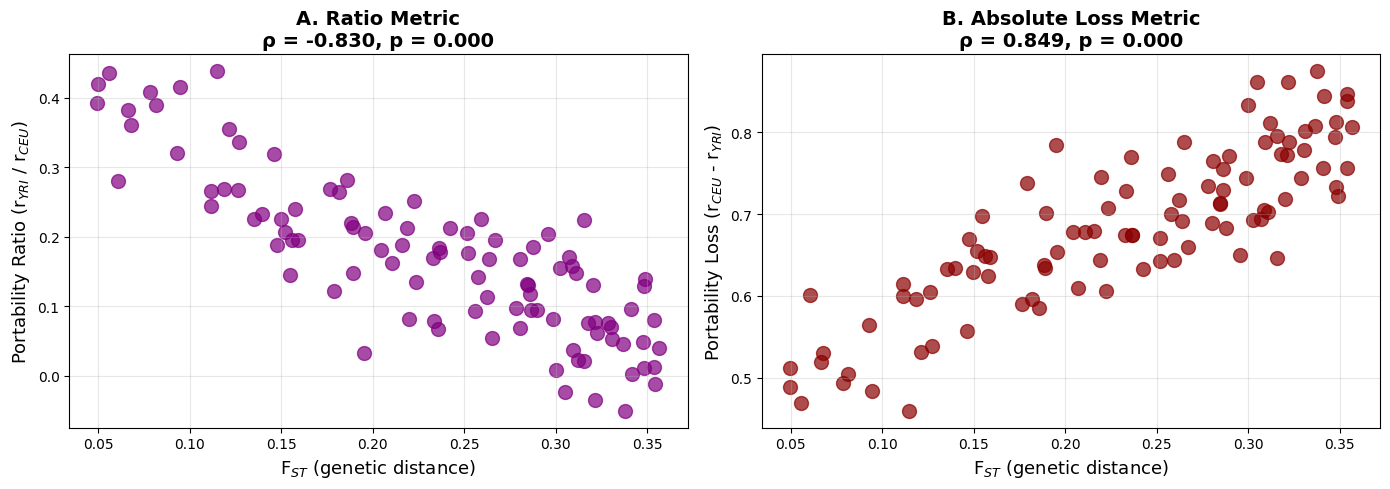


SIMPLE INTERPRETATION
✅ Portability RATIO decreases with F_ST
   Correlation: ρ = -0.830, p = 0.0000

✅ Portability LOSS increases with F_ST
   Correlation: ρ = 0.849, p = 0.0000

   INTERPRETATION:
   → Higher genetic distance → Bigger gap between discovery and target PRS
   → This is the expected result!

SUMMARY STATISTICS
Varying parameter: T_AFR_OOA
  Range: 1000.0 - 10000.0

F_ST:
  Range: 0.0495 - 0.3567
  Fold change: 7.21x

Portability ratio (r_YRI / r_CEU):
  Range: -0.050 - 0.438

Portability loss (r_CEU - r_YRI):
  Range: 0.460 - 0.875
  Change: 0.415

RELATIONSHIP WITH T_AFR_OOA
T_AFR_OOA vs F_ST:
  ρ = 0.995, p = 0.0000

T_AFR_OOA vs Portability Loss:
  ρ = 0.847, p = 0.0000

FINAL VERDICT
🎉 STRONG EVIDENCE: Genetic distance strongly affects PRS portability!
   F_ST explains ~72% of variance in portability loss


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pathlib import Path
from scipy.stats import spearmanr

# ---------------------------------------------------------
# 1. Load config to detect varying parameter
# ---------------------------------------------------------
PROJECT_ROOT = Path("/sietch_colab/akapoor/PRS_Portability")
MODEL = "out_of_africa"
CONFIG_PATH = PROJECT_ROOT / "config_files" / "experiment_config_ooa.json"

sim_base = PROJECT_ROOT / "experiments" / MODEL / "simulations"
gwas_base = PROJECT_ROOT / "experiments" / MODEL / "gwas"

# Load config to detect varying parameter
with open(CONFIG_PATH, "r") as f:
    config = json.load(f)

grid_config = config.get("grid_sampling", {})
VARYING_PARAM = grid_config.get("varying_param", "N_EU0")

print(f"Detected varying parameter: {VARYING_PARAM}")
print("="*70)

# ---------------------------------------------------------
# 2. Load data
# ---------------------------------------------------------
rows = []
for sid_dir in sorted([d for d in sim_base.iterdir() if d.is_dir() and d.name.isdigit()], 
                      key=lambda p: int(p.name)):
    for rep_dir in [d for d in sid_dir.iterdir() if d.is_dir() and d.name.startswith("rep")]:
        sid, rep = sid_dir.name, rep_dir.name.replace("rep", "")
        
        # Load parameters
        import pickle
        with open(rep_dir / "sampled_params.pkl", "rb") as f:
            params = pickle.load(f)
        
        # Load PRS results
        gwas_dir = gwas_base / sid / f"rep{rep}"
        try:
            df_ceu = pd.read_csv(gwas_dir / "gwas_prs_values_CEU.csv")
            df_yri = pd.read_csv(gwas_dir / "gwas_prs_values_YRI.csv")
            
            r_ceu = df_ceu["PRS"].corr(df_ceu["phenotype"])
            r_yri = df_yri["PRS"].corr(df_yri["phenotype"])
            
            rows.append({
                VARYING_PARAM: params.get(VARYING_PARAM, np.nan),
                "Fst": params["Fst"],
                "r_CEU": r_ceu,
                "r_YRI": r_yri,
                "portability_ratio": r_yri / r_ceu if r_ceu > 0 else np.nan,
                "portability_loss": r_ceu - r_yri,
            })
        except:
            continue

df = pd.DataFrame(rows)
print(f"\nLoaded {len(df)} simulation replicates")
print(f"Varying parameter range: {df[VARYING_PARAM].min():.1f} - {df[VARYING_PARAM].max():.1f}")

# ---------------------------------------------------------
# 3. Aggregate by varying parameter
# ---------------------------------------------------------
agg = df.groupby(VARYING_PARAM).agg({
    "Fst": "mean",
    "portability_ratio": "mean",
    "portability_loss": "mean",
    "r_CEU": "mean",
    "r_YRI": "mean"
}).reset_index()

# ---------------------------------------------------------
# 4. THE KEY PLOT
# ---------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Ratio metric
ax = axes[0]
ax.scatter(agg["Fst"], agg["portability_ratio"], s=100, alpha=0.7, color="purple")
rho1, p1 = spearmanr(agg["Fst"], agg["portability_ratio"])
ax.set_xlabel("F$_{ST}$ (genetic distance)", fontsize=13)
ax.set_ylabel("Portability Ratio (r$_{YRI}$ / r$_{CEU}$)", fontsize=13)
ax.set_title(f"A. Ratio Metric\nρ = {rho1:.3f}, p = {p1:.3f}", fontsize=14, fontweight="bold")
ax.grid(alpha=0.3)

# Right: Absolute loss metric
ax = axes[1]
ax.scatter(agg["Fst"], agg["portability_loss"], s=100, alpha=0.7, color="darkred")
rho2, p2 = spearmanr(agg["Fst"], agg["portability_loss"])
ax.set_xlabel("F$_{ST}$ (genetic distance)", fontsize=13)
ax.set_ylabel("Portability Loss (r$_{CEU}$ - r$_{YRI}$)", fontsize=13)
ax.set_title(f"B. Absolute Loss Metric\nρ = {rho2:.3f}, p = {p2:.3f}", fontsize=14, fontweight="bold")
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 5. SIMPLE INTERPRETATION
# ---------------------------------------------------------
print("\n" + "="*70)
print("SIMPLE INTERPRETATION")
print("="*70)

# Check both metrics
if abs(rho1) > 0.5 and p1 < 0.05:
    direction1 = "decreases" if rho1 < 0 else "increases"
    print(f"✅ Portability RATIO {direction1} with F_ST")
    print(f"   Correlation: ρ = {rho1:.3f}, p = {p1:.4f}")
else:
    print(f"❌ No strong relationship between F_ST and portability ratio")
    print(f"   Weak correlation: ρ = {rho1:.3f}, p = {p1:.4f}")

print()

if abs(rho2) > 0.5 and p2 < 0.05:
    direction2 = "increases" if rho2 > 0 else "decreases"
    print(f"✅ Portability LOSS {direction2} with F_ST")
    print(f"   Correlation: ρ = {rho2:.3f}, p = {p2:.4f}")
    
    if rho2 > 0:
        print("\n   INTERPRETATION:")
        print("   → Higher genetic distance → Bigger gap between discovery and target PRS")
        print("   → This is the expected result!")
    else:
        print("\n   INTERPRETATION:")
        print("   → Higher genetic distance → Smaller gap (unexpected!)")
        print("   → Check if this makes sense for your specific parameter")
else:
    print(f"❌ No strong relationship between F_ST and portability loss")
    print(f"   Weak correlation: ρ = {rho2:.3f}, p = {p2:.4f}")

# ---------------------------------------------------------
# 6. Summary statistics
# ---------------------------------------------------------
print(f"\n{'='*70}")
print("SUMMARY STATISTICS")
print("="*70)
print(f"Varying parameter: {VARYING_PARAM}")
print(f"  Range: {df[VARYING_PARAM].min():.1f} - {df[VARYING_PARAM].max():.1f}")
print(f"\nF_ST:")
print(f"  Range: {agg['Fst'].min():.4f} - {agg['Fst'].max():.4f}")
print(f"  Fold change: {agg['Fst'].max() / agg['Fst'].min():.2f}x")
print(f"\nPortability ratio (r_YRI / r_CEU):")
print(f"  Range: {agg['portability_ratio'].min():.3f} - {agg['portability_ratio'].max():.3f}")
print(f"\nPortability loss (r_CEU - r_YRI):")
print(f"  Range: {agg['portability_loss'].min():.3f} - {agg['portability_loss'].max():.3f}")
print(f"  Change: {agg['portability_loss'].max() - agg['portability_loss'].min():.3f}")

# ---------------------------------------------------------
# 7. Relationship with varying parameter
# ---------------------------------------------------------
print(f"\n{'='*70}")
print(f"RELATIONSHIP WITH {VARYING_PARAM}")
print("="*70)

rho_param_fst, p_param_fst = spearmanr(agg[VARYING_PARAM], agg["Fst"])
print(f"{VARYING_PARAM} vs F_ST:")
print(f"  ρ = {rho_param_fst:.3f}, p = {p_param_fst:.4f}")

rho_param_loss, p_param_loss = spearmanr(agg[VARYING_PARAM], agg["portability_loss"])
print(f"\n{VARYING_PARAM} vs Portability Loss:")
print(f"  ρ = {rho_param_loss:.3f}, p = {p_param_loss:.4f}")

# ---------------------------------------------------------
# 8. Final verdict
# ---------------------------------------------------------
print(f"\n{'='*70}")
print("FINAL VERDICT")
print("="*70)

if abs(rho2) > 0.7 and p2 < 0.001:
    print("🎉 STRONG EVIDENCE: Genetic distance strongly affects PRS portability!")
    print(f"   F_ST explains ~{(rho2**2)*100:.0f}% of variance in portability loss")
elif abs(rho2) > 0.5 and p2 < 0.05:
    print("✅ MODERATE EVIDENCE: Genetic distance affects PRS portability")
    print(f"   F_ST explains ~{(rho2**2)*100:.0f}% of variance in portability loss")
elif abs(rho2) > 0.3:
    print("🤔 WEAK EVIDENCE: Possible relationship, but noisy")
    print("   Consider:")
    print("   - Increasing sample size (more individuals per population)")
    print("   - More replicates per parameter value")
    print("   - Different trait architecture")
else:
    print("❌ NO EVIDENCE: F_ST does not predict portability in this setup")
    print("   Possible reasons:")
    print("   - Sample size too small")
    print("   - Causal variants are shared between populations")
    print("   - Other factors dominate over genetic distance")